In [2]:
# some plot settings
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.labelcolor'] = 'black'
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'
plt.rcParams['font.family'] = "CMU Serif"
plt.rcParams['figure.figsize'] = [10,6]
plt.rcParams['figure.dpi'] = 120 
plt.rc('text', usetex=True) 

In [1]:
# we will use the tqdm progress bar
from tqdm.auto import tqdm,trange

## 17. Waiting for buses

Let there be a total of n independently scheduled bus lines, all making hourly stops (only one is on the hour) in front of your apartment building. What is the average waiting time until a bus of one of the bus lines arrives for a rider who arrives at the stop at random? Write a Monte Carlo simulation of this scenario and run it for n = 1, 2, 3, 4, and 5. To partially check your code, the theoretical answer for the n = 1 case is obviously one-half hour (30 minutes), while for the n = 2 case the answer is the not so obvious one-third hour (20 minutes). From your simulation results, can you guess the general answer for any value of n?

In [3]:
import numpy as np

def waitingTime(n) :
    # n buses at hh_j:mm_i (i=1..n) every hour
    sims = 10**5
    totalWait = 0
    for i in range(sims) :
        # bus arrival times
        busArrivals = sorted(np.random.rand(n))
        # fraction of the hour after which the person arrives
        personArrival = np.random.rand() 
        # if the bus arrived before the person they have 
        # to wait for the same bus/line in the next hour
        # – function to add an hour
        nextBus = lambda t: t + 1 if t < personArrival else t
        nextBusTimes = np.array(list(map(nextBus, busArrivals)))
        # time differences between rider and buses
        time_Diffs = nextBusTimes - personArrival
        # waiting time
        waitTime = min(time_Diffs)
        totalWait += waitTime
    return totalWait/sims*60

In [4]:
waitDat = list( map(waitingTime, trange(1,10)) )
waitDat

  0%|          | 0/9 [00:00<?, ?it/s]

[30.062190123247458,
 20.01485633959358,
 14.994802319669411,
 12.01738416432418,
 9.987802352974581,
 8.57941535968488,
 7.515250885198002,
 6.6311632181203475,
 5.975817949301708]

From the data above, the guess for the analytical waiting time is $60/(n+1)$. Here's a comparison.

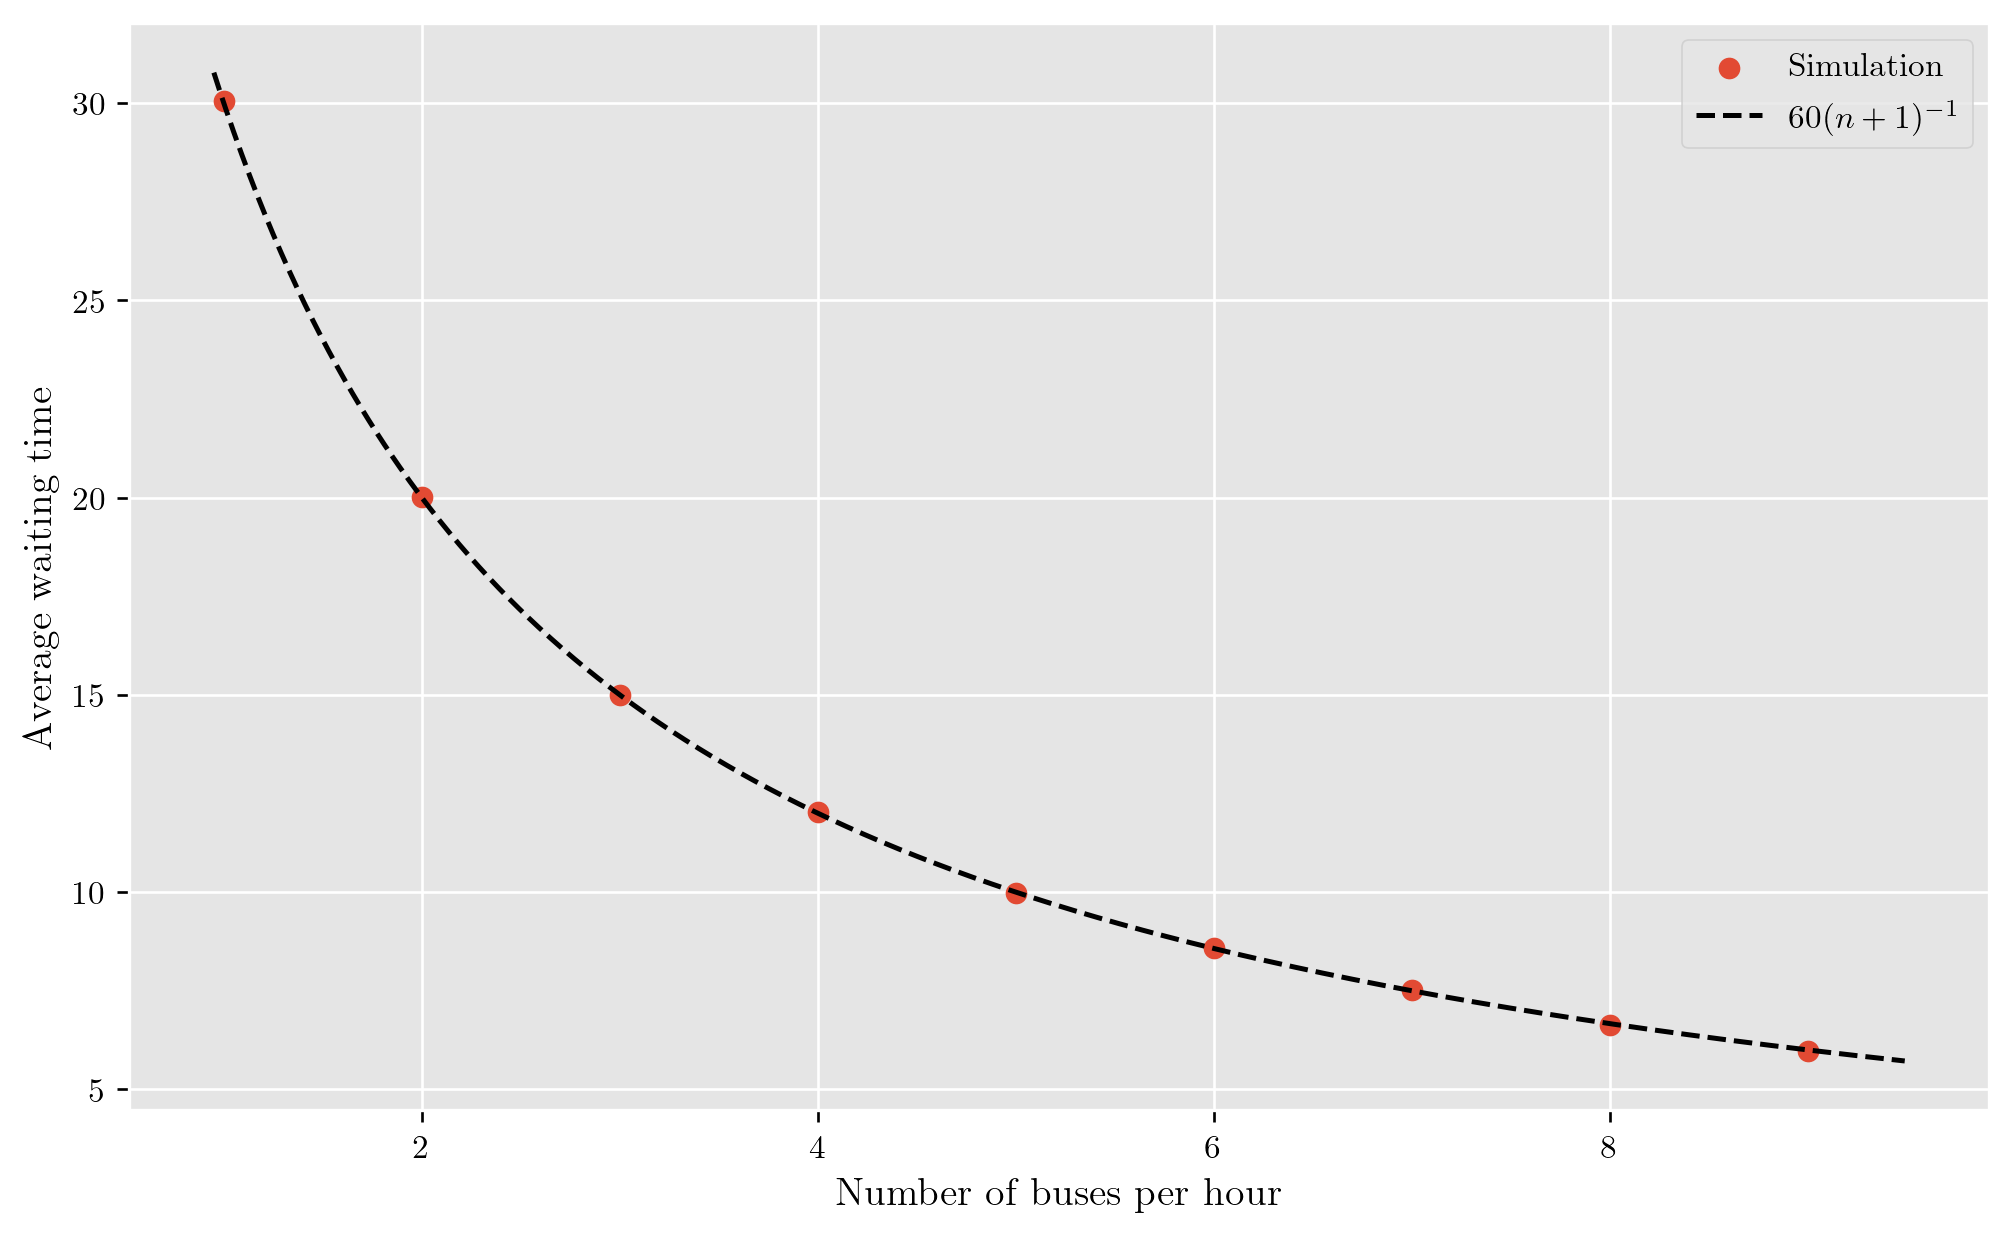

In [6]:
plt.xlabel('Number of buses per hour')
plt.ylabel('Average waiting time')
x = np.arange(0.95,9.5,0.01)
plt.scatter(np.arange(1,10), waitDat)
y = 60/(1+x)
plt.plot(x,y,'k--')
plt.legend(["Simulation","$60(n+1)^{-1}$"])
plt.show()